Deep learning on custom images

In [15]:
import matplotlib.pyplot as plt
import cv2

In [16]:
cat4 = cv2.imread('Assets/CATS_DOGS/train/CAT/4.jpg')

In [17]:
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

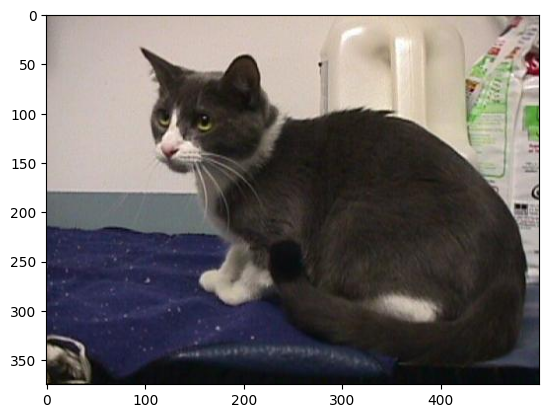

In [18]:
plt.imshow(cat4)

In [19]:
cat4.shape

(375, 500, 3)

In [20]:
dog = cv2.imread('Assets/CATS_DOGS/train/DOG/2.jpg')

In [21]:
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

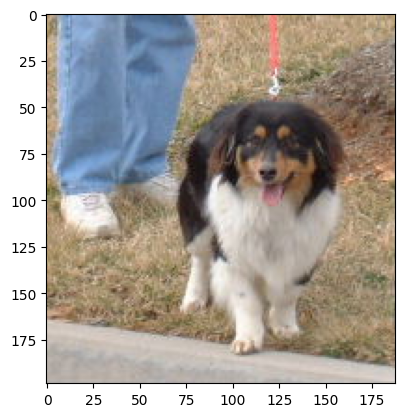

In [22]:
plt.imshow(dog)

In [23]:
dog.shape

(199, 188, 3)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
image_gen = ImageDataGenerator(rotation_range = 30,
                               width_shift_range= 0.1,
                               height_shift_range = 0.1,
                               rescale = 1/255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               fill_mode = 'nearest')

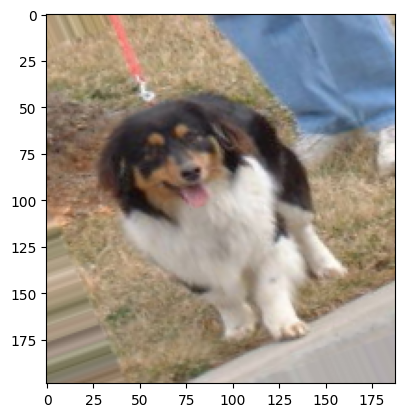

In [27]:
plt.imshow(image_gen.random_transform(dog))

In [28]:
image_gen.flow_from_directory('Assets/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [29]:
input_shape = (150, 150, 3)

In [30]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense

In [31]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

#1 because it is binary
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\Ishaan\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,065 (9.25 MB)

 Trainable params: 2,424,065 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('Assets/CATS_DOGS/train', target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 18743 images belonging to 2 classes.


In [34]:
test_image_gen = image_gen.flow_from_directory('Assets/CATS_DOGS/test', target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 6251 images belonging to 2 classes.


In [35]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [36]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [39]:
results = model.fit(train_image_gen, epochs=50, steps_per_epoch=150, validation_data=test_image_gen, validation_steps=12)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 162ms/step - accuracy: 0.5478 - loss: 0.6935 - val_accuracy: 0.5938 - val_loss: 0.6806
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - accuracy: 0.5747 - loss: 0.6841 - val_accuracy: 0.5573 - val_loss: 0.6956
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 162ms/step - accuracy: 0.5535 - loss: 0.6853 - val_accuracy: 0.5625 - val_loss: 0.6937
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 147ms/step - accuracy: 0.5612 - loss: 0.6844 - val_accuracy: 0.5469 - val_loss: 0.6849
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 129ms/step - accuracy: 0.5620 - loss: 0.6787 - val_accuracy: 0.6042 - val_loss: 0.6876
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 129ms/step - accuracy: 0.5928 - loss: 0.6707 - val_accuracy: 0.6250 - val_loss: 0.6465
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - accuracy: 0.6174 - loss: 0.6568 - val_accuracy: 0.6458 - val_loss: 0.6389
Epoch 8/50
122/150 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.6191 - loss: 0.

c:\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.6202 - loss: 0.6439 - val_accuracy: 0.6406 - val_loss: 0.6425
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.5851 - loss: 0.6732 - val_accuracy: 0.6667 - val_loss: 0.6526
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - accuracy: 0.6390 - loss: 0.6469 - val_accuracy: 0.7188 - val_loss: 0.5951
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - accuracy: 0.6417 - loss: 0.6302 - val_accuracy: 0.6719 - val_loss: 0.5980
Epoch 12/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.6625 - loss: 0.6239 - val_accuracy: 0.6615 - val_loss: 0.6258
Epoch 13/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - accuracy: 0.6528 - loss: 0.6348 - val_accuracy: 0.7292 - val_loss: 0.5607
Epoch 14/50
 11/150 ━━━━━━━━━━━━━━━━━━━━ 16s 116ms/step - accuracy: 0.7158 - loss: 0.5773

c:\Python310\lib\site-packages\PIL\TiffImagePlugin.py:850: UserWarning: Truncated File Read
  warnings.warn(str(msg))


150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.6821 - loss: 0.6069 - val_accuracy: 0.6510 - val_loss: 0.5984
Epoch 15/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - accuracy: 0.6812 - loss: 0.6324 - val_accuracy: 0.7188 - val_loss: 0.5840
Epoch 16/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.6977 - loss: 0.5815 - val_accuracy: 0.7500 - val_loss: 0.6117
Epoch 17/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.6816 - loss: 0.5960 - val_accuracy: 0.6562 - val_loss: 0.6200
Epoch 18/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.6998 - loss: 0.5715 - val_accuracy: 0.7031 - val_loss: 0.5665
Epoch 19/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - accuracy: 0.6907 - loss: 0.5848 - val_accuracy: 0.7292 - val_loss: 0.5219
Epoch 20/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - accuracy: 0.6977 - loss: 0.5694 - val_accuracy: 0.6771 - val_loss: 0.6298
Epoch 21/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.6910 - loss: 0.5751

In [38]:
results.history['accuracy']

[0.5245833396911621]

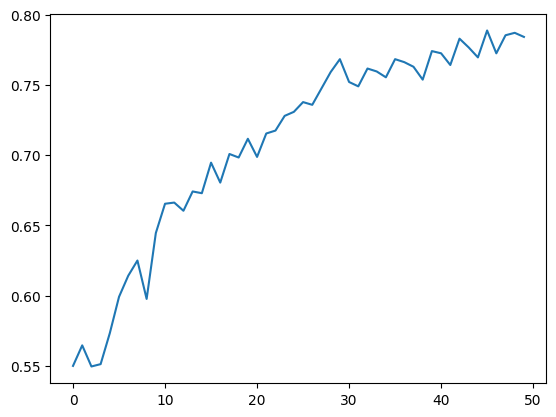

In [41]:
plt.plot(results.history['accuracy'])

In [42]:
dog_file = 'Assets/CATS_DOGS/test/DOG/10005.jpg'

In [43]:
from keras.preprocessing import image

In [45]:
dog_img = image.load_img(dog_file, target_size=(150,150))

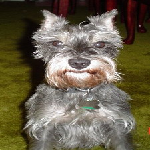

In [47]:
dog_img

In [49]:
type(dog_img)

PIL.Image.Image

In [51]:
dog_img.size

(150, 150)

In [52]:
import numpy as np

In [53]:
dog_img = np.expand_dims(dog_img, axis=0)

In [55]:
dog_img.shape

(1, 150, 150, 3)

In [56]:
dog_img = dog_img/255

In [63]:
(model.predict(dog_img)  > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[1]])